In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from PIL import Image
from numpy import asarray

In [2]:
#download the weather images and put them in a directory
path = r'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Specialization - Machine Learning/Real World Applications of Machine Learning/ML Achievement 2 MASTER FOLDER/02 Data/Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', '.DS_Store', 'Shine', 'Sunrise']


In [3]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [4]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [14]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 16, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 301ms/step - accuracy: 0.7726 - loss: 0.0825 - val_accuracy: 0.7731 - val_loss: 0.0940
Epoch 2/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8333 - loss: 0.0799 - val_accuracy: 0.8750 - val_loss: 0.0576
Epoch 3/16


2024-06-24 11:20:19.137526: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/jeremyobach/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-06-24 11:20:19.194865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 306ms/step - accuracy: 0.8254 - loss: 0.0644 - val_accuracy: 0.7685 - val_loss: 0.0928
Epoch 4/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.9167 - loss: 0.0279 - val_accuracy: 0.5000 - val_loss: 0.1706
Epoch 5/16


2024-06-24 11:20:42.728653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-24 11:20:42.789241: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 304ms/step - accuracy: 0.8092 - loss: 0.0663 - val_accuracy: 0.8056 - val_loss: 0.0780
Epoch 6/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.6667 - loss: 0.1042 - val_accuracy: 0.8750 - val_loss: 0.0324
Epoch 7/16


2024-06-24 11:21:06.022794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-24 11:21:06.082689: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 299ms/step - accuracy: 0.8667 - loss: 0.0496 - val_accuracy: 0.7824 - val_loss: 0.0943
Epoch 8/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.9167 - loss: 0.0356 - val_accuracy: 0.7500 - val_loss: 0.1190
Epoch 9/16


2024-06-24 11:21:29.022351: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-24 11:21:29.079081: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 297ms/step - accuracy: 0.8736 - loss: 0.0540 - val_accuracy: 0.7546 - val_loss: 0.0986
Epoch 10/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.8333 - loss: 0.0729 - val_accuracy: 0.6250 - val_loss: 0.1382
Epoch 11/16


2024-06-24 11:21:51.934063: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-24 11:21:51.989001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 299ms/step - accuracy: 0.8195 - loss: 0.0632 - val_accuracy: 0.7222 - val_loss: 0.1034
Epoch 12/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.9167 - loss: 0.0343 - val_accuracy: 0.6250 - val_loss: 0.1280
Epoch 13/16


2024-06-24 11:22:14.802528: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-24 11:22:14.860300: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 303ms/step - accuracy: 0.7766 - loss: 0.0836 - val_accuracy: 0.8380 - val_loss: 0.0648
Epoch 14/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.8750 - val_loss: 0.0607
Epoch 15/16


2024-06-24 11:22:38.081657: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-24 11:22:38.138920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 296ms/step - accuracy: 0.8328 - loss: 0.0585 - val_accuracy: 0.8102 - val_loss: 0.0717
Epoch 16/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.9167 - loss: 0.0200 - val_accuracy: 0.7500 - val_loss: 0.0551


2024-06-24 11:23:00.803843: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-24 11:23:00.861447: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [15]:
results = pd.DataFrame(model.history.history)

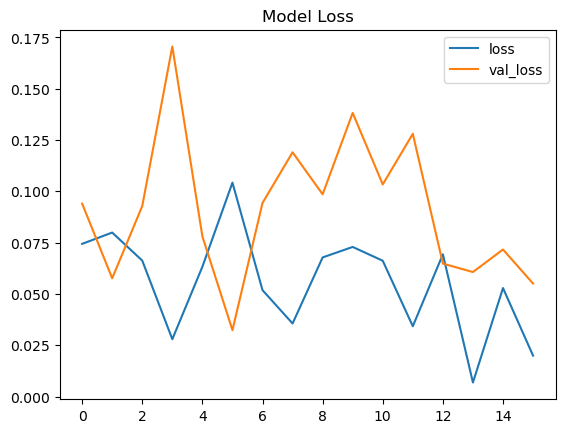

In [16]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

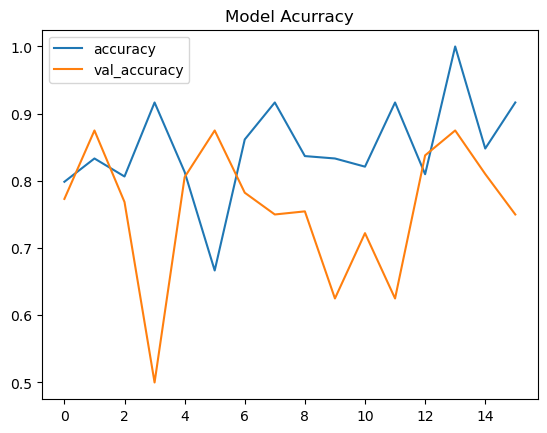

In [17]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [18]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9166666865348816, Val_Accuracy: 0.75
Loss: 0.019959719851613045, Val_Loss: 0.055066391825675964


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step


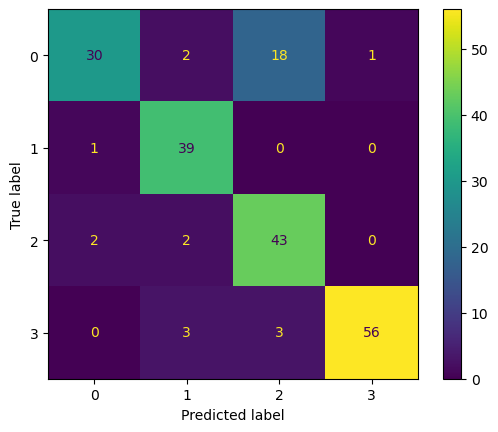

In [19]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 16 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [20]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


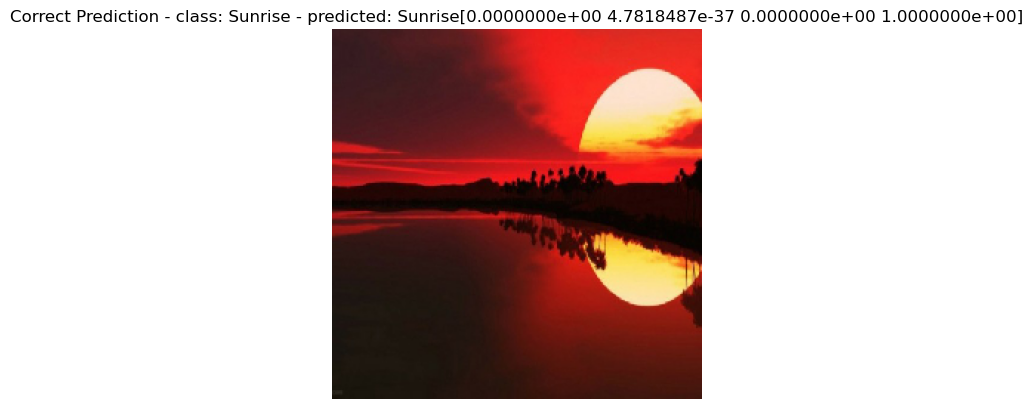

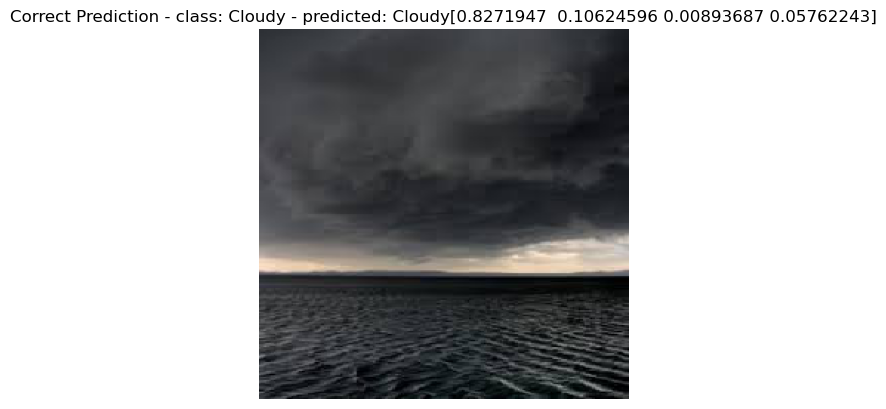

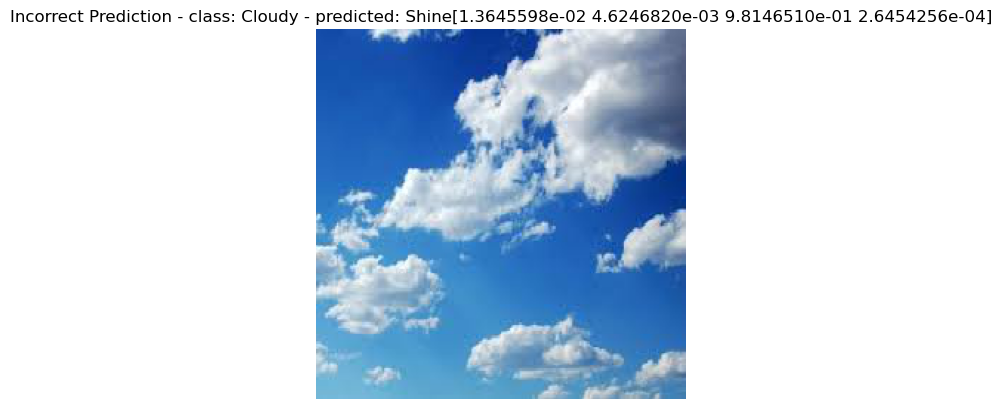

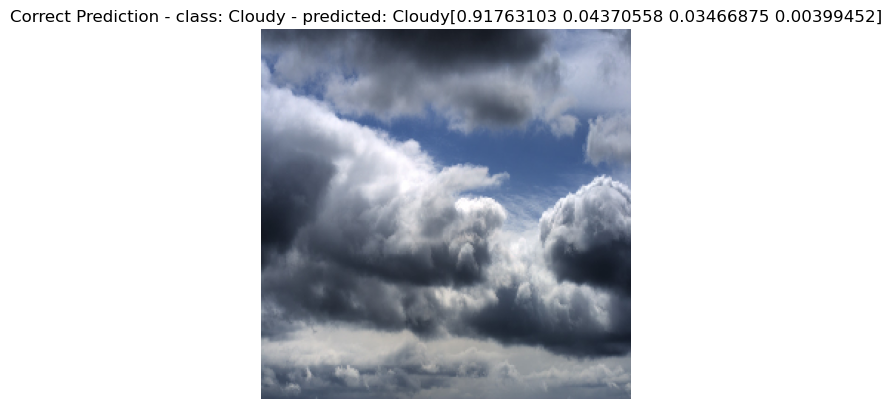

In [21]:
predict_one(model, 4) #<--you can show multiple pictures with this command. Just fill in the number you want to see.

In [22]:
path = r'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Specialization - Machine Learning/Real World Applications of Machine Learning/'

path

'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Specialization - Machine Learning/Real World Applications of Machine Learning/'

In [24]:
img = Image.open(os.path.join(path,'2.5', 'cloudysky.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(4032, 3024)
RGB


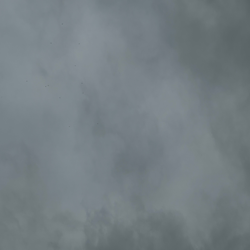

In [25]:
newsize = (250,250)
img2 = img.resize(newsize)
img2

In [28]:
# predict the class
predict_value = model.predict(img2)

ValueError: Unrecognized data type: x=<PIL.Image.Image image mode=RGB size=250x250 at 0x303C05B50> (of type <class 'PIL.Image.Image'>)